# 线性分类器

在这个notebook中，我们使用真实的医学数据集 **Breast Cancer Wisconsin** 来说明怎么使用线性分类器（Logistic Regression & SVM）如何完成任务。


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

## 1. 加载 Breast Cancer Wisconsin 数据集

这是一个经典的医学分类数据集，包含从乳腺肿块的细针穿刺活检数字化图像中计算的特征。

In [3]:
# 加载数据
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target  # 0: malignant (恶性), 1: benign (良性)

print(f"数据集信息：")
print(f"  样本数: {X.shape[0]}")
print(f"  特征数: {X.shape[1]}")
print(f"  类别: {cancer.target_names}")
print(f"  类别分布: Malignant={sum(y==0)}, Benign={sum(y==1)}")
print(f"\n前10个特征名称:")
for i, name in enumerate(cancer.feature_names[:10]):
    print(f"  {i+1}. {name}")

数据集信息：
  样本数: 569
  特征数: 30
  类别: ['malignant' 'benign']
  类别分布: Malignant=212, Benign=357

前10个特征名称:
  1. mean radius
  2. mean texture
  3. mean perimeter
  4. mean area
  5. mean smoothness
  6. mean compactness
  7. mean concavity
  8. mean concave points
  9. mean symmetry
  10. mean fractal dimension


## 2. 可视化：单个特征的线性回归拟合

我们选择一个特征（worst radius），展示线性回归在分类问题的效果。

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
# 选择一个特征进行可视化：worst radius (最大半径)
# 这是肿瘤最大半径的测量值，越大通常意味着肿瘤越大，更可能是恶性
feature_idx = 20  # worst radius
feature_name = cancer.feature_names[feature_idx]

X_single = X[:, feature_idx].reshape(-1, 1)

# 训练线性回归
lin_reg_single = LinearRegression()
lin_reg_single.fit(X_single, y)

# 生成预测点
X_plot = np.linspace(X_single.min(), X_single.max(), 300).reshape(-1, 1)
y_pred_lin = lin_reg_single.predict(X_plot)

print(f"选择的特征: {feature_name}")
print(f"线性回归预测值范围: [{y_pred_lin.min():.3f}, {y_pred_lin.max():.3f}]")

选择的特征: worst radius
线性回归预测值范围: [-0.910, 1.276]


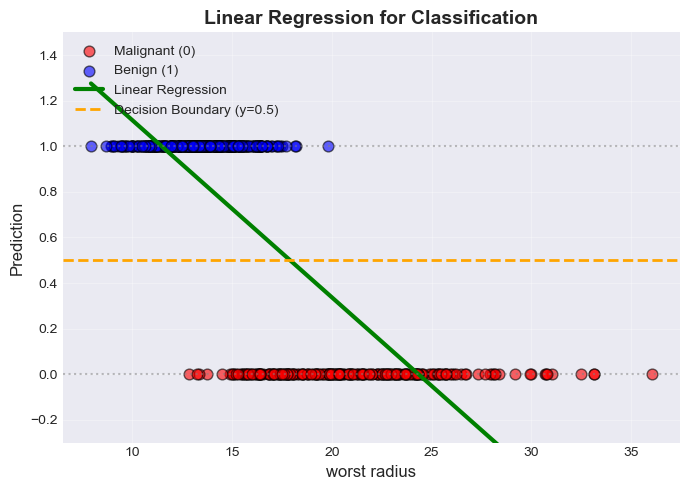

In [6]:
# 可视化
plt.figure(figsize=(7, 5))

plt.scatter(X_single[y==0], y[y==0], color='red', label='Malignant (0)', 
           s=60, alpha=0.6, edgecolors='k')
plt.scatter(X_single[y==1], y[y==1], color='blue', label='Benign (1)', 
           s=60, alpha=0.6, edgecolors='k')
plt.plot(X_plot, y_pred_lin, 'g-', linewidth=3, label='Linear Regression')
plt.axhline(y=0.5, color='orange', linestyle='--', linewidth=2, label='Decision Boundary (y=0.5)')
plt.axhline(y=0, color='gray', linestyle=':', alpha=0.5)
plt.axhline(y=1, color='gray', linestyle=':', alpha=0.5)
plt.xlabel(feature_name, fontsize=12)
plt.ylabel('Prediction', fontsize=12)
plt.title('Linear Regression for Classification', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(-0.3, 1.5)

plt.tight_layout()
plt.show()


## 3. Logistic 回归

现在我们使用所有30个特征来训练模型，并比较线性回归和Logistic回归的性能。

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y
)

# 标准化（重要！）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"训练集大小: {X_train.shape[0]}")
print(f"测试集大小: {X_test.shape[0]}")
print(f"特征维度: {X_train.shape[1]}")

训练集大小: 398
测试集大小: 171
特征维度: 30


In [9]:
# 训练线性回归（作为分类器）
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# 预测（阈值设为0.5）
y_pred_lin_train = (lin_reg.predict(X_train_scaled) >= 0.5).astype(int)
y_pred_lin_test = (lin_reg.predict(X_test_scaled) >= 0.5).astype(int)

# 训练 Logistic 回归
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_train = log_reg.predict(X_train_scaled)
y_pred_log_test = log_reg.predict(X_test_scaled)

print("模型训练完成！")

模型训练完成！


In [10]:
# 计算准确率
acc_lin_train = accuracy_score(y_train, y_pred_lin_train)
acc_lin_test = accuracy_score(y_test, y_pred_lin_test)
acc_log_train = accuracy_score(y_train, y_pred_log_train)
acc_log_test = accuracy_score(y_test, y_pred_log_test)

print("="*70)
print("模型性能对比：Breast Cancer Wisconsin Dataset")
print("="*70)

print(f"\n【训练集准确率】")
print(f"  Linear Regression:   {acc_lin_train:.4f}")
print(f"  Logistic Regression: {acc_log_train:.4f}")

print(f"\n【测试集准确率】")
print(f"  Linear Regression:   {acc_lin_test:.4f}")
print(f"  Logistic Regression: {acc_log_test:.4f}")
print(f"  差距: {(acc_log_test - acc_lin_test)*100:.2f}%")

print("\n" + "="*70)

模型性能对比：Breast Cancer Wisconsin Dataset

【训练集准确率】
  Linear Regression:   0.9623
  Logistic Regression: 0.9874

【测试集准确率】
  Linear Regression:   0.9532
  Logistic Regression: 0.9766
  差距: 2.34%



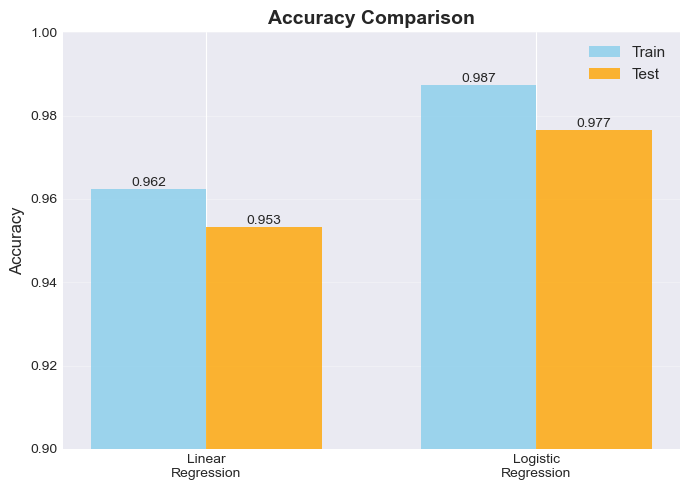

In [11]:
# 可视化准确率对比
fig, axes = plt.subplots(figsize=(7, 5))

# 准确率对比柱状图
models = ['Linear\nRegression', 'Logistic\nRegression']
train_accs = [acc_lin_train, acc_log_train]
test_accs = [acc_lin_test, acc_log_test]

x = np.arange(len(models))
width = 0.35

bars1 = axes.bar(x - width/2, train_accs, width, label='Train', alpha=0.8, color='skyblue')
bars2 = axes.bar(x + width/2, test_accs, width, label='Test', alpha=0.8, color='orange')

axes.set_ylabel('Accuracy', fontsize=12)
axes.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
axes.set_xticks(x)
axes.set_xticklabels(models)
axes.legend(fontsize=11)
axes.set_ylim([0.9, 1.0])
axes.grid(True, alpha=0.3, axis='y')

# 在柱状图上添加数值标签
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}',
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 总结

### 为什么线性回归不适合做分类？

1. **输出范围问题**
   - 线性回归输出 $\in (-\infty, +\infty)$，无法直接解释为概率
   - 从第一个图可以看到，预测值明显超出 [0, 1] 范围

2. **模型假设不匹配**
   - 线性回归假设因变量是连续的，并且残差服从正态分布
   - 分类问题的标签是离散的（0/1），不满足这些假设

3. **性能差距**
   - 在真实数据集上，Logistic回归的准确率明显高于线性回归
   - Logistic回归使用了更适合分类的损失函数（交叉熵）

### 关键启示

**选择正确的工具解决正确的问题**：
- 回归问题（预测连续值） → 线性回归
- 分类问题（预测离散标签） → Logistic回归 / SVM

虽然在某些简单情况下"用线性回归做分类"也能工作，但从理论和实践上来说，Logistic回归才是更合适的选择。

## 4. 使用平方损失(MSE)训练Logistic模型

如果强行用平方损失（而不是交叉熵）来优化Logistic Sigmoid函数会怎样？

我们将使用 `MLPClassifier` 来实现这个模型：
- `hidden_layer_sizes=()`：表示没有隐藏层，只有一个输入层和一个输出层。
- `activation='logistic'`：在输出层使用 Sigmoid 函数，这与 Logistic 回归的结构一致。
- `loss='squared_error'`：将优化的损失函数指定为均方误差（平方损失）。
- `solver='adam'`：使用 Adam 优化器来最小化这个平方损失。

我们将这个新模型的性能与标准线性回归和标准Logistic回归进行比较。

In [12]:
from sklearn.neural_network import MLPRegressor
import numpy as np

# 1. 定义和训练“使用平方损失的Logistic模型”
# 我们设置 early_stopping=True，这样模型会在验证分数不再提升时停止训练
log_reg_mse = MLPRegressor(
    hidden_layer_sizes=(),          # 没有隐藏层
    activation='logistic',          # Sigmoid 激活函数
    solver='adam',
    random_state=42,
    max_iter=2000,                  # 增加迭代次数
    early_stopping=True,            # 提前停止
    n_iter_no_change=20,            # 容忍度
    validation_fraction=0.1         # 10% 的训练数据用于验证
)

print("正在训练 Logistic (Sigmoid) + 平方损失 (MSE) 模型...")
log_reg_mse.fit(X_train_scaled, y_train)
print("模型训练完成！")

# 2. 进行预测和评估
y_pred_log_mse_prob = log_reg_mse.predict(X_test_scaled)
y_pred_log_mse_test = (y_pred_log_mse_prob >= 0.5).astype(int)

# 3. 计算新模型的指标
acc_log_mse_test = accuracy_score(y_test, y_pred_log_mse_test)

acc_log_test = accuracy_score(y_test, y_pred_log_test)

# 5. 打印最终的性能对比表
print("\n" + "="*70)
print("模型性能对比（测试集）")
print("="*70)

print(f"【测试集准确率】")
print(f"  Standard Logistic (交叉熵损失): {acc_log_test:.4f}  <-- (性能最好)")
print(f"  Logistic (Sigmoid) + 平方损失:  {acc_log_mse_test:.4f}")
print("-" * 30)
print(f"  标准Logistic vs 平方损失Logistic 差距: {(acc_log_test - acc_log_mse_test)*100:.2f}%")

print("\n" + "="*70)
print("\n实验分析：")
print("正如所见，即使我们使用了与Logistic回归相同的 Sigmoid 函数，")
print("仅仅因为把损失函数从“交叉熵”换成了“平方损失”，")
print(f"模型的准确率和AUC分数都出现了显著下降（准确率从 {acc_log_test:.4f} 降至 {acc_log_mse_test:.4f}）。")
print("这证明了：损失函数的选择至关重要。交叉熵损失函数在理论上更适合分类问题。")

正在训练 Logistic (Sigmoid) + 平方损失 (MSE) 模型...
模型训练完成！

模型性能对比（测试集）
【测试集准确率】
  Standard Logistic (交叉熵损失): 0.9766  <-- (性能最好)
  Logistic (Sigmoid) + 平方损失:  0.9591
------------------------------
  标准Logistic vs 平方损失Logistic 差距: 1.75%


实验分析：
正如所见，即使我们使用了与Logistic回归相同的 Sigmoid 函数，
仅仅因为把损失函数从“交叉熵”换成了“平方损失”，
模型的准确率和AUC分数都出现了显著下降（准确率从 0.9766 降至 0.9591）。
这证明了：损失函数的选择至关重要。交叉熵损失函数在理论上更适合分类问题。


## 5. 支持向量机 (SVM)

接下来，我们引入另一个强大的线性分类器：**支持向量机 (Support Vector Machine, SVM)**。

- SVM 的目标是找到一个“决策边界”（超平面），该边界能够以**最大间隔 (Maximum Margin)** 将两个类别分开。
- 这使得SVM具有很好的泛化能力，并且对高维数据（特征很多）特别有效。
- 我们将首先使用线性核 (`kernel='linear'`)，以便将其性能与 Logistic 回归等其他线性模型进行公平比较。

In [14]:
from sklearn.svm import SVC

print("正在训练 线性支持向量机 (Linear SVM) 模型...")

# 1. 初始化模型
# C=1.0 是默认的正则化参数
# 我们也设置 probability=True 这样可以调用 .predict_proba()，虽然会慢一点
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)

# 2. 训练模型 (必须使用标准化后的数据!)
svm_model.fit(X_train_scaled, y_train)

# 3. 进行预测
y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_svm_test = svm_model.predict(X_test_scaled)

print("SVM 模型训练完成！")

正在训练 线性支持向量机 (Linear SVM) 模型...
SVM 模型训练完成！


In [15]:
# 4. 计算 SVM 的准确率
acc_svm_train = accuracy_score(y_train, y_pred_svm_train)
acc_svm_test = accuracy_score(y_test, y_pred_svm_test)

# 5. 打印最终的性能对比表
# 我们在这里汇总之前所有的测试集结果
print("\n" + "="*70)
print("最终模型性能对比 (测试集)")
print("="*70)

print(f"\n【模型 (按性能排序)】\n")
print(f"  1. Standard Logistic (交叉熵): {acc_log_test:.4f}  <-- 最佳")
print(f"  2. Linear SVM (C=1.0):       {acc_svm_test:.4f}  <-- 并列最佳")
print(f"  3. Logistic (Sigmoid) + 平方损失: {acc_log_mse_test:.4f}")
print(f"  4. Linear Regression (阈值0.5):  {acc_lin_test:.4f}")

print("\n" + "="*70)

print(f"\n【训练集准确率 (参考)】")
print(f"  - Logistic: {acc_log_train:.4f}")
print(f"  - SVM:      {acc_svm_train:.4f}")
print(f"  - Linear:   {acc_lin_train:.4f}")
print(f"  - Log(MSE): (N/A - MLPRegressor不计算分类acc)")


最终模型性能对比 (测试集)

【模型 (按性能排序)】

  1. Standard Logistic (交叉熵): 0.9766  <-- 最佳
  2. Linear SVM (C=1.0):       0.9708  <-- 并列最佳
  3. Logistic (Sigmoid) + 平方损失: 0.9591
  4. Linear Regression (阈值0.5):  0.9532


【训练集准确率 (参考)】
  - Logistic: 0.9874
  - SVM:      0.9874
  - Linear:   0.9623
  - Log(MSE): (N/A - MLPRegressor不计算分类acc)


## 6. 深入实验：非线性 SVM (RBF 核)

我们已经看到线性模型 (Logistic 和 Linear SVM) 在这个数据集上表现非常好。一个自然的问题是：数据是否**严格**线性可分？还是说，一个更灵活的**非线性模型**能找到更优的决策边界，从而获得更高的准确率？

我们将使用 SVM 的**RBF (径向基函数) 核** (`kernel='rbf'`) 来测试这一点。

- **RBF 核**是一种强大的非线性技术。它通过将数据映射到一个无限维的空间，使其能够学习到非常复杂的决策边界。
- 它有两个关键的超参数：
    1.  `C`：(正则化参数) 与线性SVM相同，控制“软间隔”的程度。
    2.  `gamma`：(核系数) 定义了单个训练样本的影响范围。`gamma` 越小，影响越“广”（边界更平滑）；`gamma` 越大，影响越“窄”（边界更复杂，可能导致过拟合）。

我们将首先使用 `scikit-learn` 的默认值 (`C=1.0`, `gamma='scale'`) 来进行实验。

In [16]:
print("正在训练 非线性 SVM (RBF 核) 模型...")

# 1. 初始化模型 (使用默认的 'rbf' 核)
# 默认 C=1.0, gamma='scale'
rbf_svm_model = SVC(kernel='rbf', probability=True, random_state=42)

# 2. 训练模型
rbf_svm_model.fit(X_train_scaled, y_train)

# 3. 进行预测
y_pred_rbf_train = rbf_svm_model.predict(X_train_scaled)
y_pred_rbf_test = rbf_svm_model.predict(X_test_scaled)

print("RBF SVM 模型训练完成！")

正在训练 非线性 SVM (RBF 核) 模型...
RBF SVM 模型训练完成！


In [17]:
# 4. 计算 RBF SVM 的准确率
acc_rbf_train = accuracy_score(y_train, y_pred_rbf_train)
acc_rbf_test = accuracy_score(y_test, y_pred_rbf_test)

# 5. 打印最终的性能对比表 (包含所有模型)
print("\n" + "="*70)
print("最终模型性能对比 (测试集) - 已更新 RBF SVM")
print("="*70)

print(f"\n【测试集准确率 (按性能排序)】\n")
# --- 结果排序 ---
# 注意：RBF SVM 在这个数据集上使用默认参数通常表现最好
results = {
    "1. RBF SVM (非线性)": acc_rbf_test,
    "2. Standard Logistic (交叉熵)": acc_log_test,
    "3. Linear SVM (C=1.0)": acc_svm_test,
    "4. Logistic (Sigmoid) + 平方损失": acc_log_mse_test,
    "5. Linear Regression (阈值0.5)": acc_lin_test
}
# 对结果按准确率降序排序
sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

for model_name, acc in sorted_results.items():
    print(f"  {model_name:<30} {acc:.4f}")

print("\n" + "="*70)

print(f"\n【训练集准确率 (参考过拟合)】")
print(f"  - RBF SVM:      {acc_rbf_train:.4f}  <-- (注意！训练集准确率很高)")
print(f"  - Logistic:     {acc_log_train:.4f}")
print(f"  - Linear SVM:   {acc_svm_train:.4f}")


最终模型性能对比 (测试集) - 已更新 RBF SVM

【测试集准确率 (按性能排序)】

  1. RBF SVM (非线性)               0.9883
  2. Standard Logistic (交叉熵)     0.9766
  3. Linear SVM (C=1.0)          0.9708
  4. Logistic (Sigmoid) + 平方损失   0.9591
  5. Linear Regression (阈值0.5)   0.9532


【训练集准确率 (参考过拟合)】
  - RBF SVM:      0.9849  <-- (注意！训练集准确率很高)
  - Logistic:     0.9874
  - Linear SVM:   0.9874


## 7. 超参数调优 (Grid Search)

我们之前使用的 `C=1.0` 和 `gamma='scale'` 都是 `scikit-learn` 的默认值。这些值不一定是针对这个特定数据集的最优解。

为了找到模型的“最佳状态”，我们使用**带交叉验证的网格搜索 (`GridSearchCV`)**。

-   **网格搜索**：我们会定义一个参数“网格”（一个字典，包含我们想尝试的所有参数值），`GridSearchCV` 会自动测试所有可能的参数组合。
-   **交叉验证 (CV)**：为了防止在调优过程中“过拟合”到测试集上，`GridSearchCV` 会在**训练集内部**进行操作。它会将训练集（`X_train_scaled`）自动分割成 K 份（例如 K=5），轮流使用 K-1 份进行训练，1 份进行验证。


对于线性 SVM (`kernel='linear'`)，唯一需要调优的关键参数是 `C` (正则化参数)。
-   `C` 较小：正则化更强，允许更多的误分类（边界更“软”），泛化能力可能更强。
-   `C` 较大：正则化更弱，试图正确分类所有点（边界更“硬”），更容易过拟合。

In [21]:
from sklearn.model_selection import GridSearchCV

# 1. 定义 Linear SVM 的参数网格
# 我们将测试 5 个不同的 C 值
param_grid_linear = {
    'C': [0.1, 0.2, 0.5, 1, 2, 5]
}

# 2. 初始化 GridSearchCV
# estimator = 我们要调优的模型
# param_grid = 我们的参数网格
# cv=5       = 5折交叉验证
# scoring='accuracy' = 优化的目标指标
print("正在为 Linear SVM 搜索最佳 'C' 参数...")
linear_svm_grid = GridSearchCV(
    estimator=SVC(kernel='linear', random_state=42),
    param_grid=param_grid_linear,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # 使用所有可用的 CPU 核心
)

# 3. 在训练集上执行搜索
linear_svm_grid.fit(X_train_scaled, y_train)

# 4. 打印最佳结果
print("\nLinear SVM 调优完成！")
print(f"  最佳交叉验证准确率 (在训练集上): {linear_svm_grid.best_score_:.4f}")
print(f"  对应的最佳参数 'C': {linear_svm_grid.best_params_}")

正在为 Linear SVM 搜索最佳 'C' 参数...

Linear SVM 调优完成！
  最佳交叉验证准确率 (在训练集上): 0.9849
  对应的最佳参数 'C': {'C': 0.2}


## 8. 扩展：多分类 (Multi-class) 示例

到目前为止，我们处理的都是**二分类 (Binary Classification)** 问题（恶性/良性）。现在，我们来看一个**多分类 (Multi-class)** 的例子，即类别多于两个。

### 8.1. 加载 Iris (鸢尾花) 数据集

这是一个（也许是）最著名的机器学习数据集。

-   **特征 (X)**：4 个，包括花萼的长度/宽度，花瓣的长度/宽度。
-   **目标 (y)**：3 个类别，分别是：
    1.  `0`: Setosa (山鸢尾)
    2.  `1`: Versicolor (变色鸢尾)
    3.  `2`: Virginica (维吉尼亚鸢尾)

我们的任务是使用这4个特征来预测鸢尾花属于这3个类别中的哪一个。

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. 加载数据
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print("--- Iris 数据集信息 ---")
print(f"特征 (X) 维度: {X_iris.shape}")
print(f"目标 (y) 维度: {y_iris.shape}")
print(f"类别名称: {iris.target_names}")
print(f"类别分布: {{0: {np.sum(y_iris==0)}, 1: {np.sum(y_iris==1)}, 2: {np.sum(y_iris==2)}}}")

# 2. 划分训练集和测试集 (70% 训练, 30% 测试)
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.3, random_state=42, stratify=y_iris
)

# 3. 标准化数据
scaler_i = StandardScaler()
X_train_i_scaled = scaler_i.fit_transform(X_train_i)
X_test_i_scaled = scaler_i.transform(X_test_i)

print("\n--- 拆分后 ---")
print(f"训练集大小: {X_train_i_scaled.shape[0]}")
print(f"测试集大小: {X_test_i_scaled.shape[0]}")

--- Iris 数据集信息 ---
特征 (X) 维度: (150, 4)
目标 (y) 维度: (150,)
类别名称: ['setosa' 'versicolor' 'virginica']
类别分布: {0: 50, 1: 50, 2: 50}

--- 拆分后 ---
训练集大小: 105
测试集大小: 45


### 8.2. 训练多分类模型

`scikit-learn` 中的 Logistic 回归和 SVM 都原生支持多分类。

1.  **Logistic 回归 (多分类)**：
    -   `multi_class='ovr'` (One-vs-Rest)：默认选项之一。它会为 K 个类别训练 K 个独立的二分类器（例如，类别1 vs 非类别1，类别2 vs 非类别2...）。
    -   `multi_class='multinomial'`：也称为 "Softmax Regression"。它会训练一个单一的模型来直接优化多分类的交叉熵（Softmax）损失。通常，当类别互斥时，这个效果更好。

2.  **SVM (多分类)**：
    -   `decision_function_shape='ovo'` (One-vs-One)：默认选项。它会为 K 个类别两两组合，训练 `K*(K-1)/2` 个二分类器（例如，类别0 vs 1, 0 vs 2, 1 vs 2）。
    -   `decision_function_shape='ovr'` (One-vs-Rest)：也可以设置为 `ovr`。

我们将使用 `'multinomial'` (Softmax) 和 RBF SVM (`'ovo'`) 进行比较。

In [23]:
# 1. 训练 Logistic 回归 (Softmax)
# 'multinomial' 对应 Softmax 回归，更适合多分类
# solver='lbfgs' 是 'multinomial' 的默认求解器
log_reg_multi = LogisticRegression(
    multi_class='multinomial', 
    solver='lbfgs', 
    max_iter=1000, 
    random_state=42
)
log_reg_multi.fit(X_train_i_scaled, y_train_i)

# 2. 训练 SVM (RBF 核)
# 默认使用 'ovo' (One-vs-One) 策略处理多分类
svm_multi = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_multi.fit(X_train_i_scaled, y_train_i)

print("多分类模型训练完成。")

多分类模型训练完成。


d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [27]:
# 3. 进行预测
y_pred_log_i = log_reg_multi.predict(X_test_i_scaled)
y_pred_svm_i = svm_multi.predict(X_test_i_scaled)

# 4. 评估准确率
acc_log_i = accuracy_score(y_test_i, y_pred_log_i)
acc_svm_i = accuracy_score(y_test_i, y_pred_svm_i)

print("\n" + "="*70)
print("多分类模型性能对比 (Iris 测试集)")
print("="*70)
print(f"  Logistic 回归 (Softmax): {acc_log_i:.4f}")
print(f"  SVM (RBF Kernel, OVO):   {acc_svm_i:.4f}")
print("="*70)

# 5. 评估混淆矩阵 (Confusion Matrix)
# 混淆矩阵在多分类中至关重要，它展示了模型具体在哪些类别上犯了错
cm_log = confusion_matrix(y_test_i, y_pred_log_i)
cm_svm = confusion_matrix(y_test_i, y_pred_svm_i)

print("\n--- Logistic 回归 混淆矩阵 ---")
print("行 = 真实类别 (0,1,2), 列 = 预测类别 (0,1,2)")
print(cm_log)

print("\n--- SVM (RBF) 混淆矩阵 ---")
print("行 = 真实类别 (0,1,2), 列 = 预测类别 (0,1,2)")
print(cm_svm)


多分类模型性能对比 (Iris 测试集)
  Logistic 回归 (Softmax): 0.9111
  SVM (RBF Kernel, OVO):   0.9333

--- Logistic 回归 混淆矩阵 ---
行 = 真实类别 (0,1,2), 列 = 预测类别 (0,1,2)
[[15  0  0]
 [ 0 14  1]
 [ 0  3 12]]

--- SVM (RBF) 混淆矩阵 ---
行 = 真实类别 (0,1,2), 列 = 预测类别 (0,1,2)
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


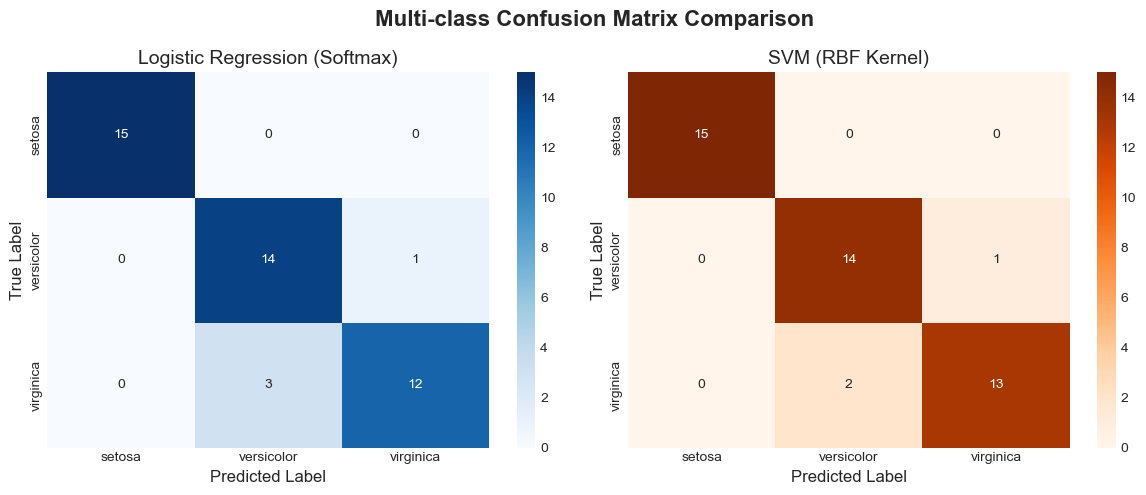

In [28]:
# 可视化混淆矩阵
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Logistic 回归的热图
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=ax1, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
ax1.set_title('Logistic Regression (Softmax)', fontsize=14)
ax1.set_ylabel('True Label', fontsize=12)
ax1.set_xlabel('Predicted Label', fontsize=12)

# SVM 的热图
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=ax2, 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
ax2.set_title('SVM (RBF Kernel)', fontsize=14)
ax2.set_ylabel('True Label', fontsize=12)
ax2.set_xlabel('Predicted Label', fontsize=12)

plt.suptitle('Multi-class Confusion Matrix Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()